In [100]:
import uproot
import glob
import numpy as np
import matplotlib.pyplot as plt

In [101]:
    # val, counts = np.mean(DV_vertexing_uncertainty.array()) 
    # print(f'{100*counts[1]/counts.sum():0.2f}% fall in the tracking-uncertainty only bin', hist_file)
    # break


In [117]:

masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}

def set_bin_content(mass, lifetime, value, arr):
    ybin = np.max(np.digitize(mass, masses)-1, 0)
    xbin = lifetimes[lifetime]
    arr[ybin,xbin] = value

def make_uncertainty_plot(histpath, title):

    uncertianty_arr = np.array([
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    [ 0.0,0.0,0.0,],
    ])

    # get bins from ntuples    
    for hist_file in glob.glob(histpath):
        # hacky way to get all MC periods
        f_mc16e = uproot.open(hist_file)
        f_mc16d = uproot.open(hist_file.replace('mc16e','mc16d'))
        f_mc16a = uproot.open(hist_file.replace('mc16e','mc16a'))
        mean = np.concatenate([
            f_mc16e['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16e['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16d['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16d['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16a['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty'].array(),
            f_mc16a['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty'].array(),
            ]).mean()
        # get mass and lifetime values
        tokens = hist_file.split('/')[4].split('_')
        file_lifetime = int(tokens[4].split('mm')[0])
        file_mass = float(tokens[3][:-1].replace('p','.'))
        set_bin_content(file_mass, file_lifetime, 1-mean, uncertianty_arr)
        # break

    # make figure
    plt.figure(figsize=[7,8])
    plt.pcolormesh([0,1,2,3], masses, uncertianty_arr)
    plt.colorbar()
    ax = plt.gca()
    ax.set_xticklabels(['','1 mm', '', '10 mm', '', '100 mm',])
    ax.set_yticks(masses)
    ax.set_title(title)
    ax.set_xlabel('lifetime [mm]')
    ax.set_ylabel('mass [GeV]')

    # set text
    for i in range(len(masses)-1):
        for j in range(len(lifetimes)):
            yloc = j+.5
            xloc = masses[i] + (masses[i+1]-masses[i])/2 
            text = ax.text(yloc, xloc , f'{uncertianty_arr[i,j]:0.2f}',
                            ha="center", va="center", color="w", transform=ax.transData)

    return uncertianty_arr



/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator


array([[0.0465865 , 0.09061003, 0.1013652 ],
       [0.04295251, 0.08263416, 0.09827415],
       [0.0415694 , 0.07828795, 0.09747106],
       [0.04148553, 0.0771109 , 0.09738352],
       [0.04132553, 0.06512166, 0.09393865],
       [0.04111123, 0.05770025, 0.08950385],
       [0.04110886, 0.05237904, 0.08978636],
       [0.04120461, 0.0506305 , 0.08430577],
       [0.04188708, 0.04795449, 0.08010136],
       [0.04308897, 0.04468282, 0.08248183]])

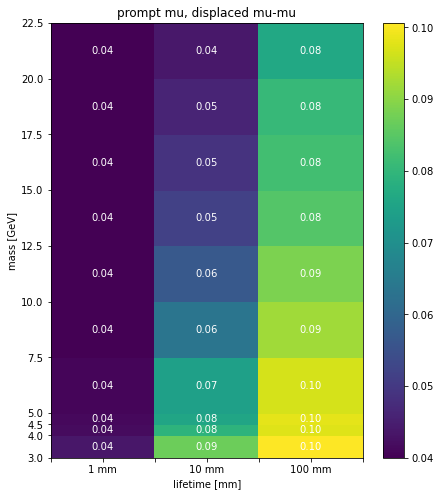

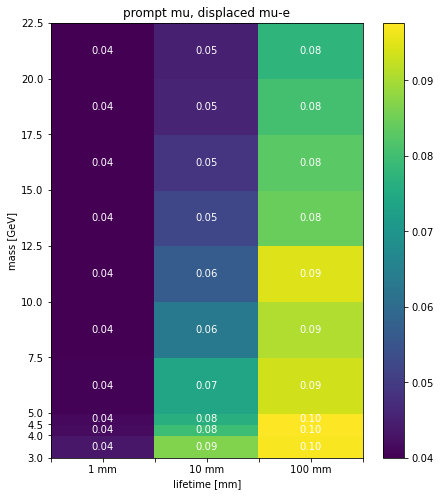

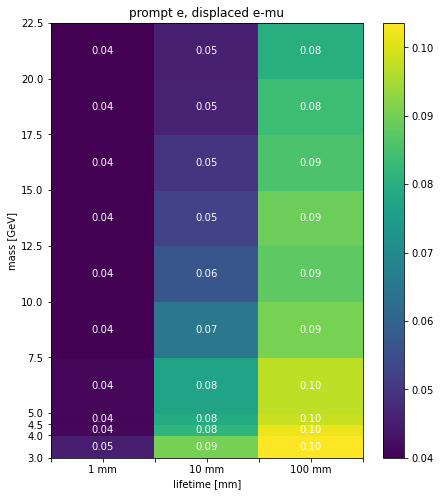

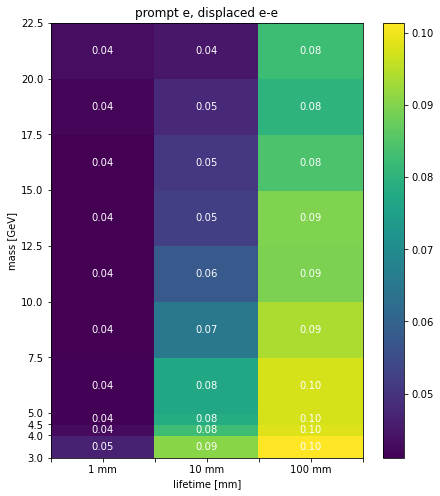

In [118]:
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_uuu_*', title='prompt mu, displaced mu-mu')
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_uue_*', title='prompt mu, displaced mu-e')
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_eeu_*', title='prompt e, displaced e-mu')
make_uncertainty_plot(histpath='/data/hnl/v4p0_histograms/histograms_mc16e_eee_*', title='prompt e, displaced e-e')


/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

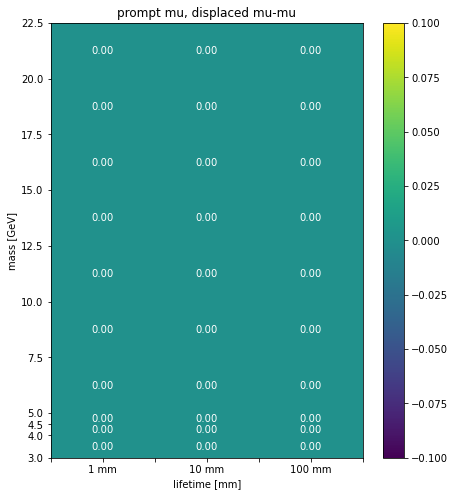

In [111]:
make_uncertainty_plot(histpath='/data/hnl/v4p10_histograms/histograms_mc16e_uuu_*', title='prompt mu, displaced mu-mu')


In [3]:
f = uproot.open('/data/hnl/v4_histograms_new/histograms_mc16e_uuu_4G_100mm.root')
DV_vertexing_uncertainty_LNV = f['VSI_LeptonsMod_ntuples_LNV_DVtype']['DV_vertexing_uncertainty']
DV_vertexing_uncertainty_LNC = f['VSI_LeptonsMod_ntuples_LNC_DVtype']['DV_vertexing_uncertainty']
DV_vertexing_uncertainty = np.concatenate([DV_vertexing_uncertainty_LNV.array(), DV_vertexing_uncertainty_LNC.array()])
mean = DV_vertexing_uncertainty.mean()
mean


0.9064177048114374

/home/newhouse/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


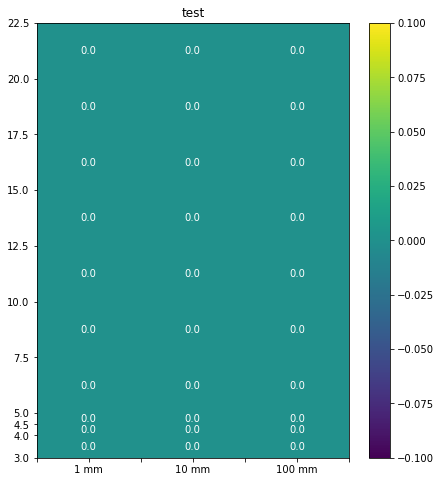

In [80]:
uncertianty_arr = np.array([
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
[ 0.0,0.0,0.0,],
])
masses = [3, 4, 4.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
lifetimes = {1:0, 10:1, 100:2}


plt.figure(figsize=[7,8])

plt.pcolormesh([0,1,2,3], masses, uncertianty_arr, shading='auto')

plt.colorbar()
ax = plt.gca()
ax.set_xticklabels(['','1 mm', '', '10 mm', '', '100 mm',])
ax.set_yticks(masses)
ax.set_title('test')

for i in range(len(masses)-1):
    for j in range(len(lifetimes)):
        yloc = j+.5
        xloc = masses[i] + (masses[i+1]-masses[i])/2 
        text = ax.text(yloc, xloc , uncertianty_arr[i,j],
                       ha="center", va="center", color="w", transform=ax.transData)
